<a href="https://colab.research.google.com/github/dedimujahid/datariski/blob/main/Salinan_Fiks_Projec_Akhir_MSIB_Orbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALISIS SENTIMEN TWITTER PADA PEMILIHAN PRESIDEN 2024 DI INDONESIA MENGGUNAKAN ALGORITMA NAIVE BAYES

# Case Study: Tweet Pilpres 2024

Menyelesaikan kasus sentimen twitter terhadap pemilihan presiden 2024 di Indonesia menggunakan skema seperti gambar di bawah ini.


Langkah-langkah penyelesaian melitputi:
1. Data collection
2. Pre-processing
   1. Case Folding
   2. Filtering
   3. Stopword
   4. Stemming
3. Feature Engineering
   1. Feature Extraction - TF Biner
   2. Feature Selection - Chi-Square
4. Modelling (Machine Learning)
   1. Naive Bayes Classifier
5. Model Evaluation
6. Deployment

Pada kasus ini, kita menggunakan data set berbahasa indonesia, sehingga kita membutuhkan *Library Sastrawi* untuk menyelesaikan beberapa permasalahan seperti *stemming*.


##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [ ]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 5.6 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Data Acquisition

Penjelasan Label Sentimen
* 0: Tweet Negatif
* 1: Tweet Netral
* 2: Tweet Positif

In [ ]:
!wget https://raw.githubusercontent.com/kinanti18/ofa-2022/main/tweetpilpres2024.csv

--2022-08-25 09:16:08--  https://raw.githubusercontent.com/kinanti18/ofa-2022/main/tweetpilpres2024.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 541647 (529K) [text/plain]
Saving to: ‘tweetpilpres2024.csv’

tweetpilpres2024.cs 100%[===================>] 528.95K  --.-KB/s    in 0.04s   

2022-08-25 09:16:09 (12.4 MB/s) - ‘tweetpilpres2024.csv’ saved [541647/541647]



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/kinanti18/ofa-2022/main/tweetpilpres2024.csv')

data.head()

,username,tweet,Sentiments
0,@jpnncom,Anggota DPD RI dapil Bali Made Mangku Pastika ...,Negatif
1,@depokinfo_,#News: HALAL BI HALAL DPC PKS BOJONGSARI DEPOK...,Positif
2,@medcom_id,"Pilpres 2024, Ahmad Ali: NasDem Didirikan untu...",Positif
3,@kontenislam_com,Prabowo Subianto dan Puan Maharani di Pilpres ...,Positif
4,@bellpass1,\n\nPetinggi Nilai Raffi Ahmad Layak Dicalonka...,Positif


In [ ]:
data.tail(10)

,username,tweet,Sentiments
3047,@strobevly,Jokowi Janji Libatkan Projo Tentukan Dukungan ...,Positif
3048,@pojok6indonesia,Pemilu 2024 di Gorontalo Butuh Anggaran Rp200 ...,Netral
3049,@BeritakanIDNews,Prabowo dan Anies Diprediksi Bakal Pecah Kongs...,Netral
3050,@eksklusif6,3 Rising Star Dewan Pimpin Pansus Raperda Stra...,Positif
3051,@mediakarya_id,AHY Dorong Kader Demokrat ‘Rebut’ Kembali Jawa...,Positif
3052,@BeritakanIDNews,Wong Cilik Deklarasi Dukung Anies-Puan di Pilp...,Positif
3053,@JDIHKPUPOLMAN,#sobatJDIH hari ini kami hadir untuk menyapa s...,Positif
3054,@GarudaMerPut,"Di depan Ganjar Pranowo dan Moeldoko, Presiden...",Netral
3055,@KaltimBerita,Pengalaman jadi Kepala Daerah Belum Cukup untu...,Netral
3056,@tukangrosok___,Tes Ombak menuju RI-1 2024.\n\nKemungkinan dan...,Positif


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    3057 non-null   object
 1   tweet       3055 non-null   object
 2   Sentiments  3057 non-null   object
dtypes: object(3)
memory usage: 71.8+ KB


In [ ]:
data.isna()

,username,tweet,Sentiments
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3052,False,False,False
3053,False,False,False
3054,False,False,False
3055,False,False,False


In [ ]:
data.isna().sum()

username      0
tweet         2
Sentiments    0
dtype: int64

In [ ]:
# untuk menangani missing value pada kolom tweet
data['tweet'].fillna(data['tweet'].mode()[0], inplace=True)
data.isna().sum()

username      0
tweet         0
Sentiments    0
dtype: int64

In [ ]:
from  sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['Sentiments'] = labelEncoder.fit_transform(data['Sentiments'])
data.head()

,username,tweet,Sentiments
0,@jpnncom,Anggota DPD RI dapil Bali Made Mangku Pastika ...,0
1,@depokinfo_,#News: HALAL BI HALAL DPC PKS BOJONGSARI DEPOK...,2
2,@medcom_id,"Pilpres 2024, Ahmad Ali: NasDem Didirikan untu...",2
3,@kontenislam_com,Prabowo Subianto dan Puan Maharani di Pilpres ...,2
4,@bellpass1,\n\nPetinggi Nilai Raffi Ahmad Layak Dicalonka...,2


In [ ]:
print('Total Jumlah Tweet:', data.shape[0], 'data\n')
print('terdiri dari (sentiments):')
print('-- [0] Tweet Negatif\t:', data[data.Sentiments == 0].shape[0], 'data')
print('-- [1] Tweet Netral\t:', data[data.Sentiments == 1].shape[0], 'data')
print('-- [2] Tweet Positif\t:', data[data.Sentiments == 2].shape[0], 'data\n')

Total Jumlah Tweet: 3057 data

terdiri dari (sentiments):
-- [0] Tweet Negatif	: 294 data
-- [1] Tweet Netral	: 716 data
-- [2] Tweet Positif	: 2047 data



3057


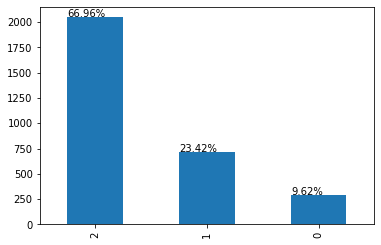

In [ ]:
s = pd.value_counts(data['Sentiments'])
ax = s.plot.bar()
n = len(data.index)
print (n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height () / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

# Text Preprocessing

## Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'[-+]?[0-9]+', '', text)
  text = re.sub(r'[^\w\s]','', text)
  text = text.strip()
  return text

In [ ]:
raw_sample = data['tweet'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Pasangan Ganjar dan 
@erickthohir
 diyakini dapat menjadi poros di pilpres 2024.
#BangkitBersamaET
Case folding	:  pasangan ganjar dan 
erickthohir
 diyakini dapat menjadi poros di pilpres 
bangkitbersamaet


## Word Normalization

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/kinanti18/ofa-2022/main/key_norm.csv

--2022-08-25 09:17:13--  https://raw.githubusercontent.com/kinanti18/ofa-2022/main/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.01s   

2022-08-25 09:17:13 (5.84 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/kinanti18/ofa-2022/main/key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['Pilpres 2024, Ahmad Ali: NasDem Didirikan untuk Mencari Anak Terbaik Bangsa']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword
#stopwords_ind = stopwords_ind

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Pasangan Ganjar dan 
@erickthohir
 diyakini dapat menjadi poros di pilpres 2024.
#BangkitBersamaET
Case folding		:  pasangan ganjar dan 
erickthohir
 diyakini dapat menjadi poros di pilpres 
bangkitbersamaet
Stopword removal	:  pasangan ganjar erickthohir diyakini poros pilpres bangkitbersamaet


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['tweet'].iloc[5]
case_folding = str(casefolding(raw_sample))
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Pasangan Ganjar dan 
@erickthohir
 diyakini dapat menjadi poros di pilpres 2024.
#BangkitBersamaET
Case folding		:  pasangan ganjar dan 
erickthohir
 diyakini dapat menjadi poros di pilpres 
bangkitbersamaet
Stopword removal	:  pasangan ganjar erickthohir diyakini poros pilpres bangkitbersamaet
Stemming		:  pasang ganjar erickthohir yakin poros pilpres bangkitbersamaet


# Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [ ]:
%%time
data['clean_teks'] = data['tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 9min 19s, sys: 2.56 s, total: 9min 22s
Wall time: 9min 23s


In [ ]:
data[['tweet', 'Sentiments','clean_teks']]

,tweet,Sentiments,clean_teks
0,Anggota DPD RI dapil Bali Made Mangku Pastika ...,0,anggota dpd ri dapil bal made memang pastika b...
1,#News: HALAL BI HALAL DPC PKS BOJONGSARI DEPOK...,2,berita halal bi halal dpc pks bojongsari depok...
2,"Pilpres 2024, Ahmad Ali: NasDem Didirikan untu...",2,pilpres ahmad ali nasdem diri cari anak baik b...
3,Prabowo Subianto dan Puan Maharani di Pilpres ...,2,prabowo subianto puan maharani pilpres hasto h...
4,\n\nPetinggi Nilai Raffi Ahmad Layak Dicalonka...,2,petinggi nilai raffi ahmad layak calon pks pil...
...,...,...,...
3052,Wong Cilik Deklarasi Dukung Anies-Puan di Pilp...,2,cilik deklarasi dukung aniespuan pilpres pasan...
3053,#sobatJDIH hari ini kami hadir untuk menyapa s...,2,sobatjdih hadir sapa sobat kpu kabupaten polew...
3054,"Di depan Ganjar Pranowo dan Moeldoko, Presiden...",1,ganjar pranowo moeldoko presiden jokowi pesan ...
3055,Pengalaman jadi Kepala Daerah Belum Cukup untu...,1,alam kepala daerah modal maju pilpres alam kep...


In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

# Feature Engineering

In [ ]:
# Memisahkan antara kolo fitur dan target
X = data['clean_teks']
y = data['Sentiments']

In [ ]:
X

0       anggota dpd ri dapil bal made memang pastika b...
1       berita halal bi halal dpc pks bojongsari depok...
2       pilpres ahmad ali nasdem diri cari anak baik b...
3       prabowo subianto puan maharani pilpres hasto h...
4       petinggi nilai raffi ahmad layak calon pks pil...
                              ...                        
3052    cilik deklarasi dukung aniespuan pilpres pasan...
3053    sobatjdih hadir sapa sobat kpu kabupaten polew...
3054    ganjar pranowo moeldoko presiden jokowi pesan ...
3055    alam kepala daerah modal maju pilpres alam kep...
3056    tes ombak ri moga paslon pilpres biaya selengg...
Name: clean_teks, Length: 3057, dtype: object

In [ ]:
y

0       0
1       2
2       2
3       2
4       2
       ..
3052    2
3053    2
3054    1
3055    1
3056    2
Name: Sentiments, Length: 3057, dtype: int64

# Feature Extraction (TF-IDF)

In [ ]:
#Menyimpan model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf = vec_TF_IDF.transform(X)

#Menyimpan vectorizer.vocabulary_
pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.pkl","wb"))

In [ ]:
#Hasil dari vocabulary dari TF-IDF
vec_TF_IDF.vocabulary_

{'anggota': 181,
 'dpd': 939,
 'ri': 3533,
 'dapil': 805,
 'bal': 335,
 'made': 2335,
 'memang': 2483,
 'pastika': 3011,
 'bahaya': 321,
 'politik': 3206,
 'identitas': 1474,
 'jelang': 1678,
 'milu': 2561,
 'nkri': 2790,
 'taruh': 4168,
 'berita': 488,
 'halal': 1337,
 'bi': 538,
 'dpc': 938,
 'pks': 3175,
 'bojongsari': 583,
 'depok': 850,
 'langkah': 2198,
 'konsolidasi': 2048,
 'songsong': 3943,
 'menang': 2493,
 'pilpres': 3152,
 'ahmad': 61,
 'ali': 122,
 'nasdem': 2724,
 'diri': 899,
 'cari': 691,
 'anak': 156,
 'baik': 326,
 'bangsa': 359,
 'prabowo': 3255,
 'subianto': 4017,
 'puan': 3329,
 'maharani': 2345,
 'hasto': 1377,
 'harap': 1360,
 'pdip': 3025,
 'kunci': 2156,
 'maju': 2358,
 'petinggi': 3136,
 'nilai': 2786,
 'raffi': 3400,
 'layak': 2223,
 'calon': 674,
 'pasang': 3003,
 'ganjar': 1179,
 'erickthohir': 1048,
 'yakin': 4610,
 'poros': 3231,
 'bangkitbersamaet': 356,
 'rawan': 3454,
 'gelar': 1215,
 'rakor': 3415,
 'la': 2167,
 'nyalla': 2825,
 'kebut': 1865,
 'daera

In [ ]:
#Melihat Jumlah Fitur yang ada
print (len(vec_TF_IDF.get_feature_names()))

4655


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Melihat fitur-fitur apa saja yang ada di dalam corpus kita
print(vec_TF_IDF.get_feature_names())

['aa', 'aamiin', 'ab', 'abadi', 'abah', 'abai', 'abangnda', 'abbas', 'abdsussalam', 'abdul', 'abdussalam', 'abrek', 'absen', 'absurb', 'abu', 'abud', 'acara', 'acau', 'account', 'aceh', 'acehasan', 'acu', 'ada', 'adaada', 'adaapahariini', 'adadikompas', 'adakan', 'adem', 'adhoc', 'adi', 'adie', 'adik', 'adil', 'adlah', 'adlh', 'adm', 'admin', 'administrasi', 'adriansyah', 'adu', 'aduh', 'adv', 'advanced', 'aespa', 'afifuddin', 'afifuddinsekjen', 'agam', 'agama', 'agamaayat', 'agamaidentitas', 'agenda', 'agnes', 'agung', 'agus', 'agusjabo', 'agustus', 'agusyudhoyono', 'ah', 'ahanies', 'ahheratdn', 'ahli', 'ahmad', 'ahmaddhaniprast', 'ahok', 'ahy', 'ahyani', 'ahyerick', 'aidil', 'air', 'airlangga', 'airlanggaanies', 'airlanggacapres', 'airlanggacapresgolkar', 'airlanggaganjar', 'airlanggahartarto', 'airlanggapemersatu', 'airlanggasolusiekonomirakyat', 'airlanggauntuksemua', 'ajak', 'ajang', 'ajar', 'aji', 'ajoorrr', 'aju', 'aka', 'akademika', 'akademisi', 'akademisprofesional', 'akar', '

In [ ]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

,aa,aamiin,ab,abadi,abah,abai,abangnda,abbas,abdsussalam,abdul,...,ziarah,zlatan,zona,zoom,zoommeet,zuhro,zul,zulkieflimansyah,zulkifli,zulkiflihasan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [ ]:
#Mengubah nilai data tabular tf-idf & y dari dataframe menjadi array agar dapat dijalankan pada proses seleksi fitur
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


chi2_features = SelectKBest(chi2, k = 1000)
X_kbest_features = chi2_features.fit_transform(x_train, y_train)

# Reduced features
print('Original feature number:', x_train.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 4655
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.438873
1,0.196893
2,0.314898
3,0.386254
4,3.340070
...,...
4650,0.141328
4651,1.221667
4652,0.853046
4653,0.129975


In [ ]:
#Menampilkan fitur yang ada dengan nilainya
feature =vec_TF_IDF.get_feature_names()
feature

Data['Fitur'] = feature
Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,0.438873,aa
1,0.196893,aamiin
2,0.314898,ab
3,0.386254,abadi
4,3.340070,abah
...,...,...
4650,0.141328,zuhro
4651,1.221667,zul
4652,0.853046,zulkieflimansyah
4653,0.129975,zulkifli


In [ ]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
162,57.980823,ancam
777,56.620188,curang
3532,50.760823,rhoma
1582,50.760823,irama
727,50.470723,china
...,...,...
4210,0.015652,tema
542,0.012300,biaya
4113,0.008648,tahan
273,0.005705,asyari


In [ ]:
#Menampilkan mask pada feature yang diseleksi
mask =chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [ ]:
#Memasukkan data yang bernilai true (fitur yang terpilih)
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['abah',
 'abai',
 'abangnda',
 'abu',
 'ada',
 'adaada',
 'adhoc',
 'adik',
 'adil',
 'adriansyah',
 'aduh',
 'agamaidentitas',
 'ahmad',
 'airlanggaganjar',
 'ajak',
 'ajar',
 'aka',
 'akbar',
 'akomodir',
 'akuiabahkawaljokowi',
 'al',
 'alas',
 'alat',
 'alias',
 'alifkamal',
 'alih',
 'alir',
 'alloh',
 'alokasi',
 'alur',
 'aman',
 'ambil',
 'amburadul',
 'ambyar',
 'amd',
 'amien',
 'amputasi',
 'analisanya',
 'ancam',
 'ancoran',
 'and',
 'andi',
 'andika',
 'andikaperkasa',
 'andreas',
 'anggap',
 'anggar',
 'anggaranpemilu',
 'angkat',
 'anies',
 'aniesahy',
 'aniesbaswedan',
 'aniesprabowo',
 'aniessandi',
 'anjing',
 'ansor',
 'antek',
 'antisipasi',
 'apa',
 'aparat',
 'apbnuntukrakyat',
 'apel',
 'apelakbarsagasumsel',
 'api',
 'aqan',
 'aqil',
 'arbi',
 'ardo',
 'arena',
 'aries',
 'ariza',
 'asai',
 'aseng',
 'asep',
 'astaghfirullahalladzim',
 'audiensi',
 'awala',
 'ayatmayat',
 'bacirita',
 'badrun',
 'bahan',
 'bahas',
 'bahaya',
 'bahlul',
 'baik',
 'baju',
 'balas

In [ ]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
#Ini digunakan untuk mengenerate fitur vector tf-idf pada proses deployment

new_selected_features = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v

new_selected_features

{'memang': 2483,
 'pastika': 3011,
 'bahaya': 321,
 'jelang': 1678,
 'nkri': 2790,
 'pks': 3175,
 'menang': 2493,
 'ahmad': 61,
 'diri': 899,
 'cari': 691,
 'baik': 326,
 'bangsa': 359,
 'puan': 3329,
 'maharani': 2345,
 'harap': 1360,
 'kunci': 2156,
 'maju': 2358,
 'pasang': 3003,
 'erickthohir': 1048,
 'poros': 3231,
 'bangkitbersamaet': 356,
 'rawan': 3454,
 'kebut': 1865,
 'hadap': 1323,
 'ajar': 80,
 'ganjaranies': 1181,
 'sulit': 4041,
 'kalah': 1786,
 'tenggelam': 4230,
 'antek': 204,
 'oligharchy': 2870,
 'sengsara': 3785,
 'rakyat': 3417,
 'percaya': 3096,
 'sungguh': 4057,
 'peduli': 3039,
 'bohong': 580,
 'netral': 2749,
 'indonesia': 1522,
 'elektabiltas': 1019,
 'suara': 4011,
 'usung': 4496,
 'pranowo': 3264,
 'roki': 3574,
 'arbi': 233,
 'putus': 3366,
 'juang': 1733,
 'perempuan': 3100,
 'anggap': 178,
 'festivalkopitanahair': 1109,
 'tani': 4155,
 'capres': 684,
 'publik': 3335,
 'dukung': 969,
 'puanmaharani': 3331,
 'tunda': 4395,
 'tanda': 4141,
 'wallahualam': 454

In [ ]:
#Melihat jumlah fitur baru berdasarkan nilai k pada chi-square
len(new_selected_features)

1000

In [ ]:
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(new_selected_features,open("selected_feature_tf-idf.pkl","wb"))

In [ ]:
#Menampilkan Fitur-fitur yang sudah diseleksi
#menampilkan fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,abah,abai,abangnda,abu,ada,adaada,adhoc,adik,adil,adriansyah,...,waspada,wata,wayang,xjam,yeee,yogiwistyo,yunus,yusuf,zalim,zlatan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelling (Machine Learning)

## Naive Bayes Classifier

In [ ]:
#Import Library
import random
from sklearn.model_selection import train_test_split

#Algoritme
#Algoritme yang dikomparasi
from sklearn import svm
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [ ]:
selected_x = X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x = selected_x
y = data.Sentiments
#Memisihkan data training dan data testing dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
#print
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 2445
Banyak data x_test  : 612
Banyak data y_train : 2445
Banyak data y_test  : 612


In [ ]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritme fitting

text_algorithm = MultinomialNB()
#text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_naive.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

#y_train

Duration: 0:00:00.025670


In [ ]:
#Prediksi
predicted = model.predict(x_test)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted))

prediksi benar:  452  data
prediksi salah:  160  data
Akurasi Algoritme:  73.8562091503268 %
TRUE NEGATIVE (TN): 13
FALSE NEGATIVE (FN): 0
TRUE POSITIVE (TP): 48
FALSE POSITIVE (FP): 6
PRECISION: 88.88888888888889 %
RECALL: 100.0 %
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        56
           1       0.81      0.30      0.44       160
           2       0.72      0.99      0.84       396

    accuracy                           0.74       612
   macro avg       0.85      0.51      0.55       612
weighted avg       0.77      0.74      0.69       612



In [ ]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.7745098  0.74836601 0.75816993 0.78431373 0.75980392 0.78104575
 0.78431373 0.74836601 0.76633987 0.75980392]
accuracy:  0.7665032679738562


In [ ]:
from joblib import load
#Hasil
pipeline = load("model_sentiment_naive.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = text_preprocessing_process(data_input)

#Load
tfidf = TfidfVectorizer


#loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(new_selected_features))
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==2):
    s ="Sentimen Positif"
elif (hasil==1):
    s ="Sentimen Netral"
else:
    s ="Sentimen Negatif"

print("Hasil prediksi:\n", s)

Masukkan sentiment:
jokowi harus 3 periode
Hasil prediksi:
 Sentimen Positif


# WordCloud

In [ ]:
# dowloand Wordcloud packages
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

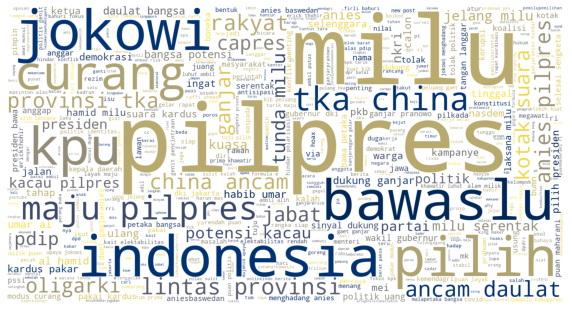

In [ ]:
# WordCloud Sentimen Negatif

sentimen_negatif = data[data.Sentiments == 0]
negatif_string = []

for t in sentimen_negatif.clean_teks:
  negatif_string.append(t)

negatif_string = pd.Series(negatif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",colormap="cividis", max_words=500,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=1500, height=800).generate(negatif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

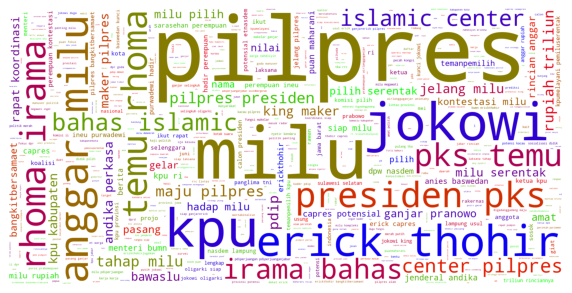

In [ ]:
# WordCloud Sentimen Netral

sentimen_netral = data[data.Sentiments == 1]
netral_string = []

for t in sentimen_netral.clean_teks:
  netral_string.append(t)

netral_string = pd.Series(netral_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color="white",colormap='brg', max_words=500,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42).generate(netral_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

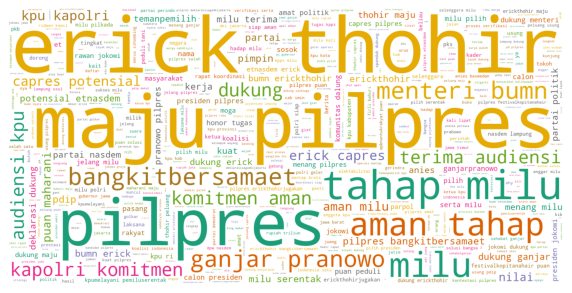

In [ ]:
# WordCloud Sentimen Positif

sentimen_positif = data[data.Sentiments == 2]
positif_string = []

for t in sentimen_positif.clean_teks:
  positif_string.append(t)

positif_string = pd.Series(positif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color="white",colormap='Dark2', max_words=500,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42).generate(positif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###LSTM


In [ ]:
data['clean_teks']

0       anggota dpd ri dapil bal made memang pastika b...
1       berita halal bi halal dpc pks bojongsari depok...
2       pilpres ahmad ali nasdem diri cari anak baik b...
3       prabowo subianto puan maharani pilpres hasto h...
4       petinggi nilai raffi ahmad layak calon pks pil...
                              ...                        
3052    cilik deklarasi dukung aniespuan pilpres pasan...
3053    sobatjdih hadir sapa sobat kpu kabupaten polew...
3054    ganjar pranowo moeldoko presiden jokowi pesan ...
3055    alam kepala daerah modal maju pilpres alam kep...
3056    tes ombak ri moga paslon pilpres biaya selengg...
Name: clean_teks, Length: 3057, dtype: object

In [ ]:
#import Tokenizer dan pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words = 100, lower=True) #num_word merupakan frekuensi kemunculan kata, brrti kata yang kemunculan >=100 tidak digunakan
tokenizer.fit_on_texts(data['clean_teks'].values)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(data['clean_teks'].values)
print(X)
X = pad_sequences(X) #default sequences di padded sesuai dengan sequence terpanjang
print(X.shape)

[[88, 42, 14, 32, 2], [93, 65, 26, 2, 93], [1, 28, 66], [80, 15, 56, 1, 73, 21, 6, 66], [30, 34, 65, 1], [70, 9, 19, 1, 16], [57, 61, 1], [28, 32, 2], [77, 1, 9, 30, 8], [77, 1, 9, 30, 8], [1, 30], [1, 30], [81, 2, 81], [1, 8, 73], [1, 8, 73], [37, 94, 21, 54, 9, 33, 1, 37, 94, 21, 54, 9], [15, 56, 30, 73, 75, 6, 1, 15, 67, 46, 75, 15], [15, 56, 10, 1, 15], [1, 15, 10, 75, 73, 15], [21, 3, 23, 92, 15, 56, 6, 10, 9, 33, 1], [2], [15, 92, 14, 2], [1], [73, 1], [1, 15, 10, 75, 73, 15, 66], [34, 1, 80, 12], [34, 70, 1, 80, 15, 9, 34, 70, 1], [63, 1, 11, 34, 81], [24, 2], [1], [1, 99, 63, 54, 10], [24, 2], [14, 1, 42], [74, 48, 97, 2], [65, 34, 1, 84], [65, 1], [20, 22, 19, 46, 39, 50, 30, 58, 4, 7, 77, 1, 16], [2, 42], [1], [20, 22, 19, 30, 6, 10, 1, 4, 7, 30, 22, 30, 16], [31, 9, 80, 65, 34, 1], [46, 81, 98, 1], [30, 34, 65, 1], [21, 10, 2], [1], [45, 77, 2], [2, 12, 71], [3, 2], [30, 34, 65, 1], [2], [2, 11, 27], [37, 87, 3, 31, 13, 1], [21, 19, 62, 68, 1, 16], [2], [3, 23, 6, 1], [31, 8

In [ ]:
print(word_index)

{'pilpres': 1, 'milu': 2, 'dukung': 3, 'erick': 4, 'kpu': 5, 'maju': 6, 'thohir': 7, 'jokowi': 8, 'ganjar': 9, 'capres': 10, 'pilih': 11, 'partai': 12, 'presiden': 13, 'politik': 14, 'puan': 15, 'bangkitbersamaet': 16, 'tahap': 17, 'aman': 18, 'erickthohir': 19, 'menteri': 20, 'pdip': 21, 'bumn': 22, 'ketua': 23, 'siap': 24, 'kapolri': 25, 'menang': 26, 'serentak': 27, 'nasdem': 28, 'potensial': 29, 'nilai': 30, 'anies': 31, 'jelang': 32, 'pranowo': 33, 'calon': 34, 'peluang': 35, 'amat': 36, 'indonesia': 37, 'komitmen': 38, 'terima': 39, 'jawa': 40, 'etnasdem': 41, 'ri': 42, 'temanpemilih': 43, 'audiensi': 44, 'kerja': 45, 'pimpin': 46, 'anggar': 47, 'provinsi': 48, 'lampung': 49, 'masyarakat': 50, 'bawaslu': 51, 'ikut': 52, 'rapat': 53, 'usung': 54, 'laksana': 55, 'maharani': 56, 'rawan': 57, 'kuat': 58, 'kabupaten': 59, 'polri': 60, 'gelar': 61, 'milik': 62, 'koalisi': 63, 'rupiah': 64, 'pks': 65, 'bangsa': 66, 'sosok': 67, 'potensi': 68, 'bahas': 69, 'pasang': 70, 'kota': 71, 'kpum

In [ ]:
# banyak kata unik dan ukuran data tensor
print('jumlah kata unik : ' + str(len(word_index)))
print('Dimensi : ' + str(X.shape))

jumlah kata unik : 4672
Dimensi : (3057, 22)


In [ ]:
#buat dummy data dari label
Y = pd.get_dummies(data['Sentiments']).values
Y.shape

(3057, 3)

In [ ]:
Y

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [ ]:
#train test split data dengan parameter yang sama dengan kasus sebelumnya
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [ ]:
#model LSTM
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten

model = Sequential()
model.add(Embedding(10000,100, input_length = X.shape[1]))
model.add(LSTM(100))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
35/35 [==============================] - 7s 79ms/step - loss: 0.8839 - accuracy: 0.6677 - val_loss: 0.8146 - val_accuracy: 0.6653
Epoch 2/5
35/35 [==============================] - 2s 58ms/step - loss: 0.7395 - accuracy: 0.6845 - val_loss: 0.7217 - val_accuracy: 0.6857
Epoch 3/5
35/35 [==============================] - 2s 60ms/step - loss: 0.6473 - accuracy: 0.7223 - val_loss: 0.6805 - val_accuracy: 0.7102
Epoch 4/5
35/35 [==============================] - 2s 60ms/step - loss: 0.6030 - accuracy: 0.7382 - val_loss: 0.6579 - val_accuracy: 0.7143
Epoch 5/5
35/35 [==============================] - 2s 59ms/step - loss: 0.5771 - accuracy: 0.7391 - val_loss: 0.6487 - val_accuracy: 0.7184


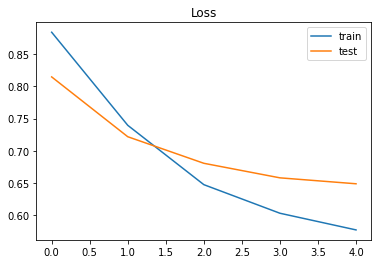

In [ ]:
#evaluation
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

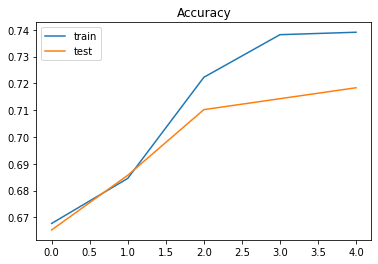

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis  =  1)
y_true = np.argmax(Y_test, axis = 1)
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true));

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.49      0.53      0.51       148
           2       0.88      0.75      0.81       464

    accuracy                           0.70       612
   macro avg       0.46      0.43      0.44       612
weighted avg       0.79      0.70      0.74       612



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_lstm = model.to_json()
with open("lstm_model.json", "w") as json_file:
  json_file.write(model_lstm )
model.save_weights("lstm_weights.h5")

In [ ]:
X_train.shape

(2445, 22)